<a href="https://colab.research.google.com/github/pietro-crc/Python_projects/blob/main/Google_Play_Store_App_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd


# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df_apps.shape

(10841, 12)

In [5]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [6]:
df_apps.sample()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
9374,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.20,115773,6.15,"10,000,000",Free,0,Everyone,Personalization,"May 22, 2018",4.1 and up


### Drop Unused Columns

Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns.

In [7]:
df_apps.drop(['Last_Updated', 'Android_Ver'],axis =1 , inplace= True)
df_apps

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


### Find and Remove NaN values in Ratings

How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows.

In [8]:
df_apps.isna()


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False


In [9]:
df_apps_clean= df_apps.dropna()

### Find and Remove Duplicates
 Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`.


In [10]:
df_apps_clean.duplicated().sum()

476

In [11]:
no_duplicate = df_apps_clean.drop_duplicates(subset=['App','Type','Price'])

In [12]:
no_duplicate


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,"1,000,000,000",Free,0,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines


# Find Highest Rated Apps

Identify which apps are the highest rated.

In [13]:
no_duplicate.sort_values(by='Rating', ascending = False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
...,...,...,...,...,...,...,...,...,...,...
1314,CR Magazine,BUSINESS,1.00,1,7.80,100,Free,0,Everyone,Business
1932,FE Mechanical Engineering Prep,FAMILY,1.00,2,21.00,"1,000",Free,0,Everyone,Education
357,Speech Therapy: F,FAMILY,1.00,1,16.00,10,Paid,$2.99,Everyone,Education
818,Familial Hypercholesterolaemia Handbook,MEDICAL,1.00,2,33.00,100,Free,0,Everyone,Medical


# Find 5 Largest Apps in terms of Size (MBs)

What's the size in megabytes (MB) of the largest Android apps in the Google Play Store.

In [14]:
no_duplicate.sort_values(by='Size_MBs', ascending = False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...
2648,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.10,66,0.02,"1,000",Paid,$1.29,Everyone,Productivity
5798,ExDialer PRO Key,COMMUNICATION,4.50,5474,0.02,"100,000",Paid,$3.99,Everyone,Communication
2684,My baby firework (Remove ad),FAMILY,4.10,30,0.01,"1,000",Paid,$0.99,Everyone,Entertainment
7966,Market Update Helper,LIBRARIES_AND_DEMO,4.10,20145,0.01,"1,000,000",Free,0,Everyone,Libraries & Demo


# Find the 5 App with Most Reviews

Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [15]:
no_duplicate.sort_values(by='Reviews', ascending = False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
...,...,...,...,...,...,...,...,...,...,...
453,Wowkwis aq Ka'qaquj,FAMILY,5.00,1,49.00,10,Free,0,Everyone,Education;Education
462,CB Fit,HEALTH_AND_FITNESS,5.00,1,7.80,10,Free,0,Everyone,Health & Fitness
901,ES Billing System (Offline App),PRODUCTIVITY,5.00,1,4.20,100,Free,0,Everyone,Productivity
1416,Ek Kahani Aisi Bhi Season 3 - The Horror Story,FAMILY,3.00,1,5.80,100,Free,0,Teen,Entertainment


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [16]:
ratings =  no_duplicate.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [17]:
import plotly.express as px

In [18]:

fig = px.pie(labels=ratings.index, values = ratings.values, names=ratings.index)
fig.update_traces(textposition= 'outside',textinfo='percent+label')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


# Numeric Type Conversion: Examine the Number of Installs
How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?

Count the number of apps at each level of installations.

Convert the number of installations (the Installs column) to a numeric data type.
- remove non-numeric characters first.

In [19]:
no_duplicate.Installs.value_counts().sort_values()

1                   3
5                   9
1,000,000,000      20
500,000,000        24
50                 56
10                 69
100,000,000       189
500               199
50,000,000        202
100               303
5,000             425
50,000            457
500,000           504
5,000,000         607
1,000             698
10,000,000        933
10,000            988
100,000          1096
1,000,000        1417
Name: Installs, dtype: int64

In [20]:
no_duplicate.Installs = no_duplicate.Installs.astype(str).str.replace(',', "")
no_duplicate.Installs = pd.to_numeric(no_duplicate.Installs)
no_duplicate[['App', 'Installs']].groupby('Installs').count()

<ipython-input-20-bc66a63c940c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-bc66a63c940c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs.


In [21]:
no_duplicate['Price'] = pd.to_numeric(no_duplicate['Price'].str.replace('$', ''), errors='coerce')


no_duplicate['Price'] = pd.to_numeric(no_duplicate['Price'], errors='coerce')
no_duplicate

<ipython-input-21-de0e98113816>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-21-de0e98113816>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-de0e98113816>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines


### The most expensive apps sub $250

In [22]:
no_duplicate = no_duplicate[no_duplicate['Price'] <= 250]
no_duplicate.sort_values(by='Price',ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
4508,myAir™ for Air10™ by ResMed,MEDICAL,3.70,236,18.00,50000,Free,0.00,Everyone,Medical
4507,AK Math Coach,FAMILY,3.60,283,18.00,50000,Free,0.00,Everyone,Education
4506,Forgotten Hill: Fall,GAME,4.40,1063,18.00,50000,Free,0.00,Teen,Adventure
4505,AE Video Poker,GAME,4.00,721,18.00,50000,Free,0.00,Teen,Casino


### Highest Grossing Paid Apps (ballpark estimate)

In [23]:
print(no_duplicate['Price'].isna().sum())
print(no_duplicate['Installs'].isna().sum())
no_duplicate['Installs'] = pd.to_numeric(no_duplicate['Installs'].replace(',', ''), errors='coerce')


no_duplicate['Installs'] = pd.to_numeric(no_duplicate['Installs'], errors='coerce')

no_duplicate['Revenue_Estimate'] = no_duplicate['Price'] * no_duplicate['Installs']


0
0


<ipython-input-23-b81e4c9e445a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-b81e4c9e445a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-b81e4c9e445a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
no_duplicate.sort_values(by='Revenue_Estimate', ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
...,...,...,...,...,...,...,...,...,...,...,...
4508,myAir™ for Air10™ by ResMed,MEDICAL,3.70,236,18.00,50000,Free,0.00,Everyone,Medical,0.00
4507,AK Math Coach,FAMILY,3.60,283,18.00,50000,Free,0.00,Everyone,Education,0.00
4506,Forgotten Hill: Fall,GAME,4.40,1063,18.00,50000,Free,0.00,Teen,Adventure,0.00
4505,AE Video Poker,GAME,4.00,721,18.00,50000,Free,0.00,Teen,Casino,0.00


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [25]:
no_duplicate.Category.nunique()

33

In [26]:
top10_category = no_duplicate.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [27]:
category_test = no_duplicate.groupby('Category').agg({'App':pd.Series.count})
category_test

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


### Vertical Bar Chart - Highest Competition (Number of Apps)

In [28]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)

bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [29]:
category_installs = no_duplicate.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


In [30]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()


### Category Concentration - Downloads vs. Competition


* First, create a DataFrame that has the number of apps in one column and the number of installs in another:



* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this.



Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log')

In [31]:
cat_number = no_duplicate.groupby('Category').agg({'App': pd.Series.count})

cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)



The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [32]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

scatter.show()


# Extracting Nested Data from a Column

How many different types of genres are there? Can an app belong to more than one genre? what happens when use .value_counts() on a column with nested values?
.split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html).


In [52]:
# no_duplicate.Genres.value_counts()

split_list = no_duplicate.Genres.str.split(';',expand=True).stack()

split_list.value_counts()


Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

# Colour Scales in Plotly Charts - Competition in Genres

In [56]:
import matplotlib.pyplot as plt

In [60]:
# Ottieni i risultati di value_counts() in un DataFrame
genre_counts = split_list.value_counts().reset_index()

# Rinomina le colonne
genre_counts.columns = ['Category', 'Total']

# Ora hai un DataFrame con le colonne 'Categoria' e 'Totale'
print(genre_counts)


                   Category  Total
0                     Tools    719
1                 Education    587
2             Entertainment    498
3                    Action    304
4              Productivity    301
5           Personalization    298
6                 Lifestyle    298
7                   Finance    296
8                   Medical    292
9                    Sports    270
10              Photography    263
11                 Business    262
12            Communication    258
13         Health & Fitness    245
14                   Casual    216
15         News & Magazines    204
16                   Social    203
17               Simulation    200
18           Travel & Local    187
19                   Arcade    185
20                 Shopping    180
21        Books & Reference    171
22  Video Players & Editors    150
23                   Dating    134
24                   Puzzle    124
25        Maps & Navigation    118
26             Role Playing    111
27                  

<BarContainer object of 10 artists>

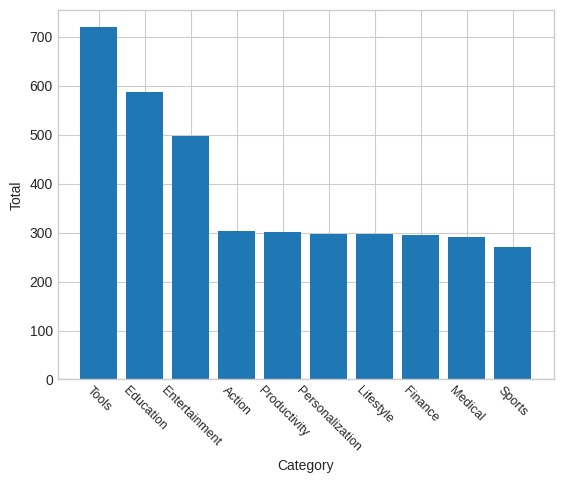

In [90]:
plt.xticks(fontsize=9, rotation= -45)
plt.ylabel('Total')
plt.xlabel('Category')


plt.bar(genre_counts.Category[:10], genre_counts.Total[:10])

In [103]:
import plotly.express as px

fig = px.bar(genre_counts[:15], x="Category", y='Total', color='Total',
                 title="Numeric 'size' values represents continuous color",
                 color_continuous_scale='sunset')


fig.show()



# Grouped Bar Charts: Free vs. Paid Apps per Category

 [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart:



use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category.

`categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).

In [166]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


In [105]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()


,Category,Type,App
0,ART_AND_DESIGN,Free,59
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [124]:

fig = px.bar(df_free_vs_paid ,x="Category", y="App", color="Type", title="Long-Form Input",barmode="group")
fig.update_xaxes(categoryorder='total descending')
fig.update_yaxes(type='log')
fig.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

[Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart.




In [165]:

fig = px.box(df_apps_clean, x="Type", y="Installs", color="Type",notched=True,
             boxmode="overlay", points='all',title='How Many Downloads are Paid Apps Giving Up?')
 # or "inclusive", or "linear" by default
fig.update_yaxes(type='log')
fig.show()



# Plotly Box Plots: Revenue by App Category


Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?


In [197]:
df_paid_apps = no_duplicate[no_duplicate['Type'] == 'Paid']
# df_paid_apps = no_duplicate
box = px.box(df_paid_apps,
             x='Category',
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show()

df_paid_apps


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
233,Chess of Blades (BL/Yaoi Game) (No VA),FAMILY,4.80,4,23.00,10,Paid,14.99,Teen,Casual,149.90
248,The DG Buddy,BUSINESS,3.70,3,11.00,10,Paid,2.49,Everyone,Business,24.90
291,AC DC Power Monitor,LIFESTYLE,5.00,1,1.20,10,Paid,3.04,Everyone,Lifestyle,30.40
...,...,...,...,...,...,...,...,...,...,...,...
7957,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,4.40,32496,99.00,1000000,Paid,0.99,Teen,Action,"990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
7988,Where's My Water?,FAMILY,4.70,188740,69.00,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,"1,990,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"


In [195]:
no_duplicate

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity,0.00
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines,0.00


# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps.

In [202]:
n= no_duplicate[no_duplicate.Type == 'Paid']
print (f'the median price is : {n.Price.median()}$')

the median price is : 2.99$


In [207]:
df_paid_apps = no_duplicate[no_duplicate['Type'] == 'Paid']
# df_paid_apps = no_duplicate
box = px.box(df_paid_apps,
             x='Category',
             y='Price',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max ascending'},
                  yaxis=dict(type='log'))


box.show()